In [2]:
import pandas as pd
import numpy as np

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'
houshold_raw = pd.read_stata('/Users/maxweber/Downloads/JOLE share/household.dta')

In [5]:
houshold_raw.columns

Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc', 'spouse', 'earn_male', 'earn_female',
       'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens',
       'type', 'reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5',
       'amt5', 'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9',
       'reb10', 'amt10', 'reb11', 'amt11', 'reb12', 'amt12'],
      dtype='object')

# Data Exploration and Descritption

## ToDo:
- is earn_male/female not topcoded
> compare the sum to the total hh income
- 

In [6]:
houshold_raw.shape

(417829, 48)

In [7]:
houshold_raw[['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc']].describe()

,swave,year,ehrefper,whfnwgt,tfearn,tftotinc,rf_new,famsize,totearn,totinc
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,2.706346,2008.609352,101.236724,3165.464649,5259.549957,5760.240783,2.571911,2.845865,4950.686035,5392.017578
std,1.342574,0.487896,4.006889,1275.666959,5781.356315,5822.155966,1.389535,1.567134,5646.872070,5679.446289
min,1.000000,2008.000000,101.000000,0.000000,-50000.000000,-48591.000000,1.000000,1.000000,-50000.000000,-50000.000000
25%,2.000000,2008.000000,101.000000,2191.241500,1650.000000,2161.000000,1.000000,2.000000,1443.000000,1906.000000
50%,3.000000,2009.000000,101.000000,3050.485400,3984.000000,4351.000000,2.000000,3.000000,3634.000000,4001.000000
75%,4.000000,2009.000000,101.000000,3907.595200,7167.000000,7591.000000,4.000000,4.000000,6751.000000,7116.000000
max,5.000000,2009.000000,205.000000,25529.882800,98083.000000,101970.000000,28.000000,22.000000,98083.000000,98686.000000


In [8]:
houshold_raw[[ 'spouse', 'earn_male', 'earn_female', 'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 
          'totcens','type', 'reb_spend', 'reb_save', 'reb_debt']].describe()

,spouse,earn_male,earn_female,sex_if_single,flex,moonlit,selfemp,totwork,totcens,type,reb_spend,reb_save,reb_debt
count,417829.000000,311053.000000,348261.000000,176344.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.577952,4118.764648,2260.470215,1.605498,0.560521,0.022469,0.175218,1.170443,0.038437,1.244471,0.267959,0.161320,0.617985
std,0.495003,4972.812012,3066.344238,0.489045,0.655534,0.152112,0.423538,0.673011,0.200358,0.429727,0.565415,0.462197,0.713390
min,0.000000,-50000.000000,-20588.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1198.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3124.000000,1583.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5417.000000,3333.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,96244.000000,93500.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [13]:
#houshold[-['swave', 'famsize', 'tfearn', 'ssuid', 'epppnum', 'spouse', 'whfnwgt', 'flex', 'srefmon']].columns
unknown_var_lst = houshold_raw[houshold_raw.columns.difference(['swave', 'famsize', 'tfearn', 'ssuid', 'epppnum',
                                                        'spouse', 'whfnwgt', 'flex', 'srefmon','amt10', 'amt11', 
                                                        'amt12', 'amt4', 'amt5', 'amt6', 'amt7', 'amt8','amt9',
                                                       'reb10', 'reb11', 'reb12', 'reb4', 'reb5', 'reb6', 'reb7', 
                                                        'reb8','reb9'])].columns

# columns not used/described by Powell
unknown_var_lst.sort

<bound method Index.sort of Index(['earn_female', 'earn_male', 'ehrefper', 'month', 'moonlit', 'reb_debt',
       'reb_save', 'reb_spend', 'rf_new', 'selfemp', 'sex_if_single', 'tage',
       'tftotinc', 'totcens', 'totearn', 'totinc', 'totwork', 'tpearn',
       'tptotinc', 'type', 'year'],
      dtype='object')>

In [132]:
print('!!include as dummy !! \n paper: month relative to interview month \n')
houshold_raw['srefmon'].unique()

!!include as dummy !! 
 paper: month relative to interview month 



['Fourth Reference month', 'First Reference month', 'Second Reference month', 'Third Reference month']
Categories (4, object): ['First Reference month' < 'Second Reference month' < 'Third Reference month' < 'Fourth Reference month']

In [9]:
print('\n percentage of HHs getting rebate: ', houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 
                'reb10', 'reb11', 'reb12']].describe()[1:2].sum().sum(),'\n')

houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 'reb10', 'reb11', 'reb12']].describe()


 percentage of HHs getting rebate:  0.8130646876525134 



,reb4,reb5,reb6,reb7,reb8,reb9,reb10,reb11,reb12
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.058196,0.242484,0.266724,0.182261,0.038202,0.010966,0.006955,0.005158,0.002118
std,0.234093,0.428915,0.441937,0.386899,0.191129,0.103797,0.082946,0.071507,0.045937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

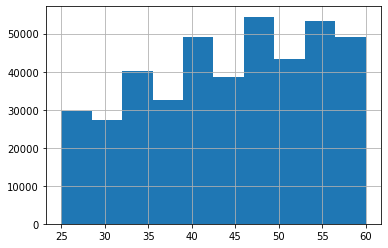

In [10]:
houshold_raw['tage'].hist()

In [253]:
houshold_raw[['earn_male', 'earn_female']].describe()

,earn_male,earn_female
count,311053.000000,348261.000000
mean,4118.764648,2260.470215
std,4972.812012,3066.344238
min,-50000.000000,-20588.000000
25%,1198.000000,0.000000
50%,3124.000000,1583.000000
75%,5417.000000,3333.000000
max,96244.000000,93500.000000


# Data Cleaning 

- keep if swave<3
- replace month=12+month if year==2009
- minmonth=min(month), by(ssuid epppnum) ?
- famsize=6 if famsize>6 (keep?)
- pp=group(ssuid epppnum)
    -> bys pp: keep if _N==8
- ??? rebate: replace X=X/1000 ???

## ToDo:

- drop observations with rebate_month not in observations?
- robustness check(?): keep all waves and see if longer timeframes available for sufficiently large N
- topcoding? income<0; familysize; 
- tpearn= tfearn ?
- create dummies for variables to control for in tau 
> start with the variables used in the paper. 'interactions permit the earnings distribution to shift based on':
> - marital status
> - family size 
> - month
> - month relative to the interview month

- **optional**: add assert statements to the functions for error handling

(198574, 49)

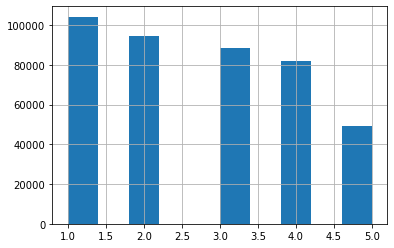

In [141]:
houshold_raw['swave'].hist()
houshold = houshold_raw[houshold_raw.swave <= 2]
houshold.shape

# Create Variables
- pp as index
- pp_count to subset to houshold available for 8 periods 
- month_total
- amt_tot
- everreb
- min_month
- reb_month
- lag_time
- change_spouse

## ToDo

- define mu_i
- dummies for houshold characteristics-groupings
- **check that housholds with multiple individuals are not duplicated**
> - pp is unique identifier from epppnum + ssuid, ssuid is the HH-id
> - to have some individual data, both individuals are in the data set
> - explore observations grouped by ssuid with count(ssuid) > 1


In [142]:
#houshold['epppnum'].unique().shape #11
#houshold['ssuid'].unique().shape #26519

houshold['pp'] = houshold.groupby(['ssuid','epppnum']).ngroup() #26569 unique
pp_count = houshold.groupby(['pp']).size() # need index for merging!

houshold = houshold.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
houshold = houshold[houshold['pp_count']== 8]

print(len(houshold['pp'].unique())) #  N = 22998 as in figure 1 (results) Powell(2020) (dropped ~4k)
print(len(houshold['ssuid'].unique()))
houshold.shape # (198574, 51)

22998
22998


(183984, 50)

there are a lot of HHs with more than 8 periods available!


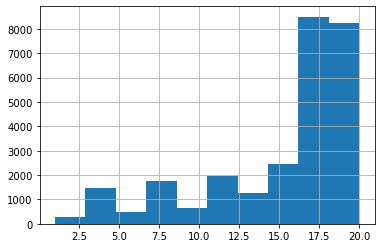

In [14]:
houshold2 = houshold_raw
houshold2['pp'] = houshold_raw.groupby(['ssuid','epppnum']).ngroup() #26569 unique
#houshold2.drop('pp', axis=1, inplace=True)
pp_count = houshold2.groupby(['pp']).size() # need index for merging!
pp_count.hist()
del houshold2
#houshold2 = houshold2.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
#houshold2[houshold2['pp_count']< 8].shape
print('there are a lot of HHs with more than 8 periods available!')

In [143]:
houshold.set_index('pp', inplace = True)
houshold.head()

,ssuid,swave,srefmon,month,year,ehrefper,whfnwgt,tfearn,tftotinc,epppnum,...,amt8,reb9,amt9,reb10,amt10,reb11,amt11,reb12,amt12,pp_count
pp,,,,,,,,,,,,,,,,,,,,,
0,019128000276,2,Fourth Reference month,January,2009,101,3973.9954,0,381,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,019128000276,1,First Reference month,June,2008,101,3282.6489,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,019128000276,1,Second Reference month,July,2008,101,3269.0889,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,019128000276,1,Third Reference month,August,2008,101,3262.1228,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,019128000276,1,Fourth Reference month,September,2008,101,3242.7625,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [144]:
houshold['amt_tot'] = houshold[['amt4', 'amt5', 'amt6','amt7', 'amt8','amt9', 'amt10', 'amt11', 'amt12']].sum(axis=1)
houshold['amt_tot'].describe()

count    183984.000000
mean        728.870422
std         560.518372
min           0.000000
25%         300.000000
50%         600.000000
75%        1200.000000
max        4500.000000
Name: amt_tot, dtype: float64

In [145]:
#  sum of all rebate dummy columns
houshold['everreb'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11', 'reb12']].sum(axis=1)
houshold['everreb'].describe()

count    183984.000000
mean          0.816941
std           0.386538
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: everreb, dtype: float64


 If unable to use NaN in lags, also look for which timeframe has the largest obs-count 



<AxesSubplot:>

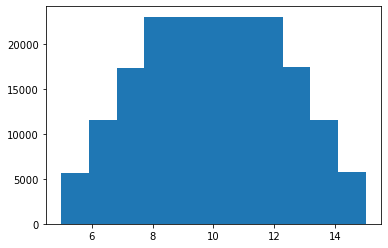

In [146]:
month_number_dict = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

houshold.replace({'month': month_number_dict}, inplace = True)

# lambda function to get total month (Jan 2008 != Jan 2009)
def get_total_month(year,month):
    if year == 2009:
        return month+12
    else:
        return month
        
houshold['month_total'] = houshold.apply(lambda x: get_total_month(x['year'],x['month']),axis=1)

print('\n If unable to use NaN in lags, also look for which timeframe has the largest obs-count \n')

houshold['month_total'].hist(grid=False, bins = len(houshold['month_total'].unique()))

In [147]:
min_month = houshold.groupby('pp')['month_total'].min()
min_month.describe()

count    22998.000000
mean         6.503913
std          1.111733
min          5.000000
25%          6.000000
50%          6.000000
75%          7.000000
max          8.000000
Name: month_total, dtype: float64

In [148]:
# get month of payout from rebX columns
houshold['reb_month'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11',
          'reb12']].idxmax(axis=1).str.slice(start = 3)

def correct_reb_month(reb_month,everreb):
    if everreb == 0:
        return np.NaN
    else:
        return reb_month
        
houshold['reb_month'] = houshold.apply(lambda x: correct_reb_month(x['reb_month'],x['everreb']),axis=1)

houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [149]:
#houshold[houshold['reb_month']<=7]['reb_month'].hist()
#houshold[houshold['reb_month']>7]['reb_month'].hist()
houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [150]:
houshold['reb_month'] = pd.to_numeric(houshold['reb_month'])#.astype(int)
houshold['lag_time'] =  houshold['month_total'] - houshold['reb_month']
houshold['lag_time'].unique()
# drop NaN and convert to int(?)

array([nan,  8.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  0.,  9., -1., -2.,
       -4., -3., -5., 10., 11., -6., -7.])

In [151]:
#houshold[['month_total', 'reb_month', 'lag_time']]
houshold['lag_time'].describe()

count    150304.000000
mean          3.995423
std           2.807277
min          -7.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: lag_time, dtype: float64

582
Should I include this? This is one of the few continous variables


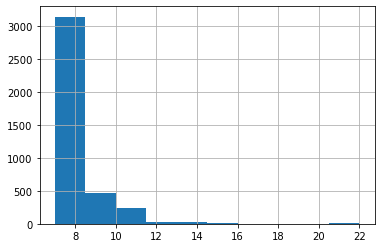

In [134]:
# topcode family size like in Powell paper -> replace famsize=6 if famsize>6
# should this step be excluded?
print(len(houshold.index[houshold['famsize'] > 6].unique())) # 479 families
houshold['famsize'][houshold['famsize'] > 6].hist()

houshold['famsize'][houshold['famsize'] > 6] = 6

print('Should I include this? This is one of the few continous variables')

In [152]:
# generate dummy for change in maritial status
spouse_sum = houshold.groupby(['pp'])['spouse'].sum()
houshold = houshold.merge(houshold.groupby(['pp'])['spouse'].sum(), on = 'pp', how = 'left' )
houshold['spouse'] = houshold['spouse_x']
houshold['spouse_sum'] = houshold['spouse_y']
houshold.drop('spouse_x', axis = 1, inplace = True)
houshold.drop('spouse_y', axis = 1, inplace = True)

#houshold[['spouse', 'spouse_sum']].describe()
#houshold['spouse_sum'].unique()

def get_change_spouse(spouse_sum):
    if spouse_sum == 0 or spouse_sum == 8 :
        return 0
    else:
        return 1
        
houshold['change_spouse'] = houshold.apply(lambda x: get_change_spouse(x['spouse_sum']),axis=1)

houshold[['change_spouse', 'spouse_sum']].describe()

,change_spouse,spouse_sum
count,183984.000000,183984.000000
mean,0.006305,4.617662
std,0.079153,3.943544
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,8.000000
75%,0.000000,8.000000
max,1.000000,8.000000


# Subset df for the analysis 

Dataframe containing only the variables used in the analysis. 
The first subset is the default dataset without any grouping dummies, but all variables as standard control variables.
Each grouping-setup will have its own subset.

## Outcome: 
select row for each HH with lag_time (lag_lead) of interest
- **tf_earn**: model as absolute value or as percentage change?

## Covariates:
- **dummy variables**: spouse, change_spouse, reb_month, srefmon, famsize, change_famsize 
- **continous variables**: tot_rebate, see variables used for heterogeneity estimation
> - per robustness checks included/excluded
>> How are the papers handling this?




#### HH specific Intercept - mu_i
that captures differences in the average level of labor income across households

#### HH types (groups) for Heterogeneity 
- non-labor earnings (= total earnings - labor earnings) as measure for liquidity?
> - multiple ways to calculate and group this variable (amount; ratio of labor/non-labor)
- changes in non_labor earnigns? are assets sold?
- age (tage)
- earn_male larger/smaller earn_female
> - also include lags of this? e.g. income 6 months before

# ToDo:
- get change variable for famsize
- (*change lag_time to leads_lags*)
- use longer timeframe than 8 months? -> expand total_month calculation

In [331]:
# subset default
subset_default = houshold[['lag_time', 'tfearn', 'amt_tot',
                           'spouse', 'change_spouse', 'srefmon', 'reb_month', 'famsize', 'tage']]
subset_default.columns

# subset for each lag/lead of interest leads:lag_time<0, lags:lag_time>0
timeframe_analysis = [-1,0,1,2,3,4]

for t in timeframe_analysis:
    subset_t = subset_default[subset_default['lag_time']==t]
    print('created subset for lag ', t, 'with dimensions ', subset_t.shape, '.')
    

created subset for lag  -1 with dimensions  (4855, 9) .
created subset for lag  0 with dimensions  (9246, 9) .
created subset for lag  1 with dimensions  (13571, 9) .
created subset for lag  2 with dimensions  (16738, 9) .
created subset for lag  3 with dimensions  (18368, 9) .
created subset for lag  4 with dimensions  (18560, 9) .


# Open Questions:

- how is **mu_i** defined? a dummy for each household or a average spending computed manually? (over the whole timeframe or only before the reception of the rebate?)
- Parker defines **ESP** as the average rebate for this type of houshold -> why not take the actual rebate amount?
- think about the **inidividual** dataset and how to use it -> look at paper
- when I estimate the equation with on equation for each lag do I need to include a total_month variable instead of the rebate time variable in tau?
- how should I account for missing lags/asymetric **lag-availability**? Should I only include HHs with all lags of interest available or is it fine to have different HH combinations depending on the lag?
> make hist of the min_month variable and see which timeframe is the most frequent with e.g. lag_time -3 to 3

- **month relative to interview month**: srefmonth-reb_month? see Stata Code
- How to include variables changing during the time frame?
- what variables from full dataset could be interesting
> - amount variables for each type of work e.g.  TMLMSUM (Amount of income from moonlighting or extra jobs in this month)
> - TOTHPROP or EAST4A Rental property owned -> search assets/property


In [243]:
houshold.columns
#houshold['moonlit'].describe()
#houshold['tage'].hist()

Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc', 'earn_male', 'earn_female',
       'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens',
       'type', 'reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5',
       'amt5', 'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9',
       'reb10', 'amt10', 'reb11', 'amt11', 'reb12', 'amt12', 'pp_count',
       'reb_month', 'everreb', 'month_total', 'lag_time', 'spouse_sum',
       'change_spouse', 'spouse', 'amt_tot'],
      dtype='object')

## individual data not used in main analysis

-> maybe incorporate to have additional info?

In [222]:
individual = pd.read_stata('/Users/maxweber/Downloads/JOLE share 2/individual.dta', convert_categoricals = False)

In [26]:
individual.shape

(664317, 61)

In [223]:
individual.columns

# table 6 only
#tpearn = personal earnings
#eabre = original SIPP variable regarding work absences
#rmesr = original SIPP variable regarding employment status

Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc',
       'epdjbthn', 'eawop', 'eabre', 'eptwrk', 'eptresn', 'ehrsall', 'tmlmsum',
       'rmesr', 'rmwkwjb', 'rmwksab', 'rmhrswk', 'rwksperm', 'epayhr1',
       'epayhr2', 'ebno1', 'ebno2', 'rf_new', 'famsize', 'totearn', 'totinc',
       'spouse', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens', 'type',
       'reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12', 'amt12'],
      dtype='object')

In [254]:
individual['type'].unique()

array([ 1.,  3.,  2., nan], dtype=float32)

# Original Data from Census Bureau

In [17]:
import pandas as pd    
wave1_raw = pd.read_csv('/Users/maxweber/Downloads/p08putm1.dat', header = None)

wave1_raw.shape

(105663, 1)

(105663, 1)

# Old/Wrong code snippets

### Function for pivoted covariates

(from rows to columns)


In [34]:
# write function that returns a df with the row values as columns for each year.

# drop NaN in lag_time column?
def get_pivoted_feature(df, col_name):
    rslt_df = df.pivot(columns = 'lag_time', values = col_name)
    clm_lst = []
    for i in range(len(rslt_df.columns)):
        clm_lst.append(col_name +  '_' + str(rslt_df.columns[i]))
    rslt_df.columns = clm_lst
    return rslt_df

get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'tftotinc').replace(np.NaN,0) #.describe()

,tftotinc_-7.0,tftotinc_-6.0,tftotinc_-5.0,tftotinc_-4.0,tftotinc_-3.0,tftotinc_-2.0,tftotinc_-1.0,tftotinc_0.0,tftotinc_1.0,tftotinc_2.0,tftotinc_3.0,tftotinc_4.0,tftotinc_5.0,tftotinc_6.0,tftotinc_7.0,tftotinc_8.0,tftotinc_9.0,tftotinc_10.0,tftotinc_11.0
pp,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3489.0,3489.0,3489.0,3489.0,3631.0,3631.0,3631.0,3631.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5085.0,5085.0,5085.0,5085.0,6930.0,6930.0,6930.0,6930.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1544.0,1544.0,1544.0,1544.0,2344.0,529.0,2237.0,1884.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4607.0,14798.0,11771.0,11991.0,11177.0,11177.0,11177.0,11177.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8833.0,8833.0,8833.0,8833.0,10666.0,10666.0,10666.0,10666.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12639.0,10695.0,10695.0,9722.0,2365.0,2227.0,2365.0,2365.0,0.0,0.0,0.0,0.0
26564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11959.0,11959.0,11959.0,11959.0,30206.0,30206.0,30206.0,30206.0,0.0,0.0
26566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14426.0,16143.0,14375.0,13895.0,15999.0,15999.0,15383.0,15659.0,0.0


In [160]:
#houshold3 = houshold
len(houshold3['ssuid'].unique())

22998

In [198]:
from linearmodels import PanelOLS
import statsmodels.api as sm

houshold = houshold3
houshold.reset_index(inplace = True, drop = True)

In [199]:
pivoted_reb = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0)

houshold = houshold.merge(pivoted_reb, how ='outer', left_index = True, right_index=True)
houshold[houshold['everreb'].notnull()][pivoted_reb.columns]

,everreb_-7.0,everreb_-6.0,everreb_-5.0,everreb_-4.0,everreb_-3.0,everreb_-2.0,everreb_-1.0,everreb_0.0,everreb_1.0,everreb_2.0,everreb_3.0,everreb_4.0,everreb_5.0,everreb_6.0,everreb_7.0,everreb_8.0,everreb_9.0,everreb_10.0,everreb_11.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
houshold[['everreb_-7.0','everreb_-6.0', 'everreb_-5.0', 'everreb_-4.0', 'everreb_-3.0','everreb_-2.0', 'everreb_-1.0', 'everreb_0.0', 'everreb_1.0', 
       'everreb_2.0', 'everreb_3.0', 'everreb_4.0', 'everreb_5.0', 'everreb_6.0', 'everreb_7.0', 'everreb_8.0', 'everreb_9.0', 'everreb_10.0', 'everreb_11.0']]

,everreb_-7.0,everreb_-6.0,everreb_-5.0,everreb_-4.0,everreb_-3.0,everreb_-2.0,everreb_-1.0,everreb_0.0,everreb_1.0,everreb_2.0,everreb_3.0,everreb_4.0,everreb_5.0,everreb_6.0,everreb_7.0,everreb_8.0,everreb_9.0,everreb_10.0,everreb_11.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
#houshold['month_total'] = pd.Categorical(houshold['month_total'])
houshold = houshold.reset_index().set_index(['ssuid','month_total'], drop = True)
houshold.index

MultiIndex([('019128000276', 13),
            ('019128000276',  6),
            ('019128000276',  7),
            ('019128000276',  8),
            ('019128000276',  9),
            ('019128000276', 10),
            ('019128000276', 11),
            ('019128000276', 12),
            ('019128000932', 13),
            ('019128000932',  6),
            ...
            ('955925986857', 11),
            ('955925986857', 12),
            ('955958398688', 13),
            ('955958398688', 14),
            ('955958398688',  7),
            ('955958398688',  8),
            ('955958398688',  9),
            ('955958398688', 10),
            ('955958398688', 11),
            ('955958398688', 12)],
           names=['ssuid', 'month_total'], length=183984)

In [202]:
exog_vars = houshold[['everreb_-2.0', 'everreb_-1.0', 'everreb_0.0', 'everreb_1.0','everreb_2.0', 'everreb_3.0', 'everreb_4.0', 'everreb_5.0', 'everreb_6.0', 
                      'everreb_7.0', 'everreb_8.0', 'everreb_9.0', 'everreb_10.0', 'everreb_11.0']].multiply(houshold['amt_tot'], axis = 'index')
exog = sm.add_constant(exog_vars)

model = PanelOLS(houshold['tfearn'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)

model.fit()

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/linearmodels/panel/model.py:1184: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,tfearn,R-squared:,0.0001
Estimator:,PanelOLS,R-squared (Between):,0.0007
No. Observations:,150304,R-squared (Within):,0.0004
Date:,"Sat, May 28 2022",R-squared (Overall):,0.0006
Time:,15:03:23,Log-likelihood,-1.343e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.0466
Entities:,18788,P-value,0.4023
Avg Obs:,8.0000,Distribution:,"F(14,131492)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,1.0466


In [108]:
houshold.loc['955958398688'].sort_index()[['everreb_-2.0', 'everreb_-1.0', 'everreb_0.0', 'everreb_1.0','everreb_2.0', 'everreb_3.0', 'everreb_4.0', 'everreb_5.0']]

,everreb_-2.0,everreb_-1.0,everreb_0.0,everreb_1.0,everreb_2.0,everreb_3.0,everreb_4.0,everreb_5.0
month_total,,,,,,,,
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### dataframe with pivoted features / cross sectional layout

In [311]:
from functools import reduce
output = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'tfearn')
lagged_reb = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'amt_tot')
control_dummies = houshold[['spouse', 'change_spouse', 'srefmon', 'reb_month', 'famsize']].groupby('pp').first()
cont_variables = houshold[['tage']].groupby('pp').first()

variables = [output, lagged_reb, control_dummies, cont_variables]
df_default = reduce(lambda  left,right: \
                    pd.merge(left,right, left_index = True, right_index = True, how='outer'), variables)
df_default.shape

(22998, 44)